# Perform Analysis 02 Analysis
The analysis is a 1x7 repeated measures ANOVA comparing denoising strategies, with subject as the repeated measure.

If the main effect of denoising strategy is significant, we will perform Tukey HSD tests, with a focus on comparisons between different denoising methods and MEDN.

In [1]:
library(multcomp)
library(nlme)
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.1.2”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘dplyr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


Warning message:
“package ‘multcomp’ was built under R version 4.1.2”
Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Warning message:
“package ‘TH.

In [2]:
df=read_csv("test_data2.csv")
df <- within(df, {
  subject <- factor(subject)
  denoising_strategy <- factor(denoising_strategy)
})

Rows: 30 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): denoising_strategy
dbl (2): subject, cnr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(df)

subject,cnr,denoising_strategy
<fct>,<dbl>,<fct>
1,0.8203642,A
1,0.8258592,B
1,0.4926534,C
2,0.1501506,A
2,0.9495144,B
2,0.1506518,C


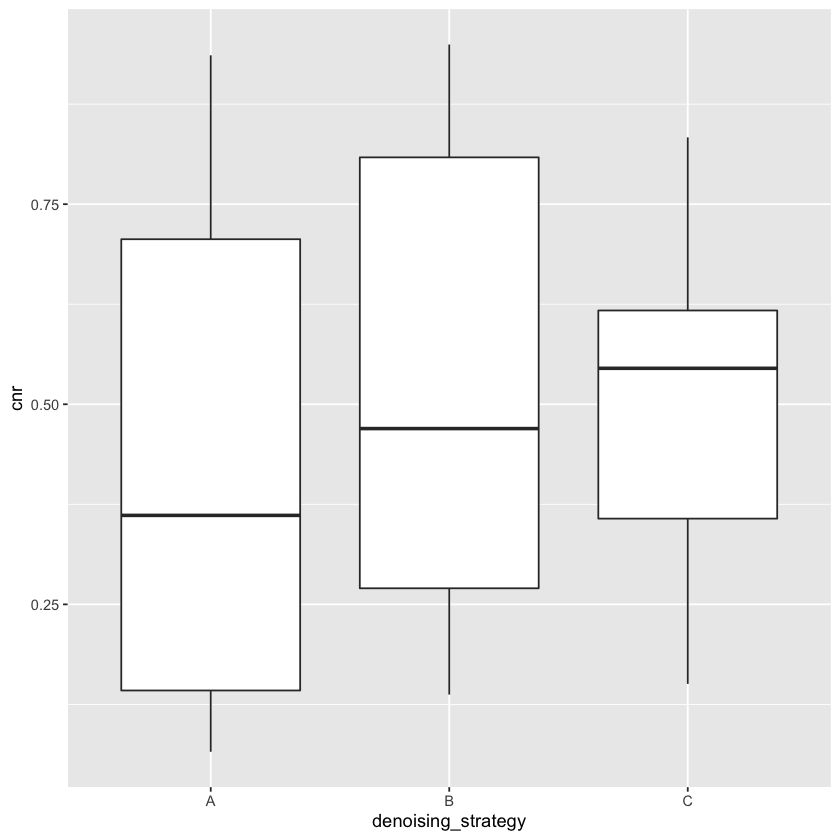

In [4]:
ggplot(df, aes(y=cnr, x=denoising_strategy))+geom_boxplot()

## Perform 1-Way ANOVA

In [6]:
cnr_anova=aov(cnr~denoising_strategy + Error(subject / denoising_strategy), data=df)
summary(cnr_anova)


Error: subject
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9  0.468   0.052               

Error: subject:denoising_strategy
                   Df Sum Sq Mean Sq F value Pr(>F)
denoising_strategy  2 0.0409 0.02046   0.206  0.815
Residuals          18 1.7852 0.09918               

### Tukey post-hoc tests

In [7]:
lme_df = lme(cnr ~ denoising_strategy, data=df, random=~1|subject)
anova(lme_df)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,18,85.8613672,2.847863e-08
denoising_strategy,2,18,0.2451512,7.851568e-01


In [8]:
summary(glht(lme_df, linfct=mcp(denoising_strategy="Tukey")), test=adjusted(type="bonferroni"))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lme.formula(fixed = cnr ~ denoising_strategy, data = df, random = ~1 | 
    subject)

Linear Hypotheses:
           Estimate Std. Error z value Pr(>|z|)
B - A == 0  0.08400    0.12919    0.65        1
C - A == 0  0.07107    0.12919    0.55        1
C - B == 0 -0.01293    0.12919   -0.10        1
(Adjusted p values reported -- bonferroni method)
